# Додаткові завдання №5

## 1 Задача 1.10.10
Випадкова величина $\xi$ має щiльнiсть $p(x) = e^{-2 |x|}$.
Обчислити
1. $\mathsf{P}(\xi < 1)$;
2. $\mathsf{P}(\xi < 3|\xi \geq 2)$;
3. $\mathsf{E}\xi, \mathsf{D}\xi$.

1. $\mathsf{P}(\xi < 1)=(\int_{-\infty}^{1}e^{-2|t|}dt)=(\int_{-\infty}^{0}e^{2t}dt)+(\int_{0}^{1}e^{-2t}dt)=0.5-0.5e^{-2}+0.5=1-0.5e^{-2}$;
2. $\mathsf{P}(\xi < 3|\xi \geq 2)=(\int_{2}^{3}e^{-2|t|}dt)=-0.5e^{-}+0.5e^{-4}$;
3. $\mathsf{E}\xi=(\int_{-\infty}^{\infty}te^{-2|t|}dt)=0$,
$\mathsf{D}\xi=\int_{-\infty}^{\infty}t^{2}e^{-2|t|}dt=2\int_{-\infty}^{0}t^{2}e^{2t}dt=0.25Г(3)=0.5$.

### 1.1 Завдання 1
Реалізуйте випадкову величину $\xi$ за допомогою класу [scipy.stats.rv_continuous](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html).

In [5]:
# Місце для Вашого коду

from scipy.stats import rv_continuous
class xi_(rv_continuous):
    def _pdf(self, x):
        return np.exp(-2*(np.abs(x))) 

### 1.2 Завдання 2
Зобразіть графічно функцію щільності та функцію розподілу отриманої випадкової величини.

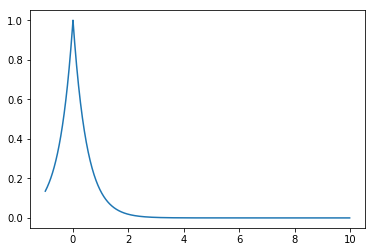

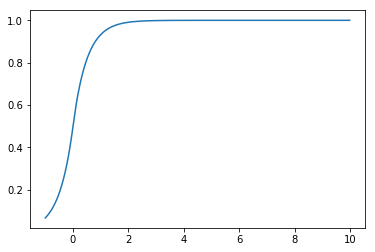

In [8]:
# Місце для Вашого коду
import matplotlib.pyplot as plt
import numpy as np
xi=xi_()
x=np.arange(-1, 10, 0.01)
y = xi.pdf(x)
plt.plot(x, y)
plt.show()
x=np.arange(-1, 10, 0.01)
y = xi.cdf(x)
plt.plot(x, y)
plt.show()

### 1.3 Завдання 3
Розв'яжіть задачу за допомогою отриманої випадкової величини та порівняйте результати з теоретично розрахованими.

In [13]:
# Місце для Вашого коду
print(xi.cdf(1), 1-0.5*np.exp(-2))
print(xi.cdf(3)-xi.cdf(2), -0.5*np.exp(-6)+0.5*np.exp(-4))#тут виводиться два значення:перше -  за допомогою функції розподілу випадкової величини, друге - теоретичне
print(xi.expect())#для пункту 3 теоретичне значення обчислино на початку роботи. І вони рівні, а отже, мають мають бути правильними
def f(x):
    return (x - xi.expect())**2
print(xi.expect(f))

0.9323323583816931 0.9323323583816936
0.007918443356022542 0.00791844335603391
0.0
0.49999999999999994


## 2 Апроксимація числа $\pi$ (задача Бюффона)

Розглянемо дві паралельні прямі на площині, відстань між якими дорівнює $1$. Не втрачаючи загальності, нехай ці прямі задаються рівностями $y = 0$ та $y = 1$. Кинемо на цю площину голку довжиною $1$ так, що координата по осі $y$ її середини рівномірно розподілена на $[0,1]$, а кут між голкою та віссю $x$ (додатною піввіссю $x$) рівномірно розподілений на $[0, \pi]$. Тоді ймовірність того, що голка перетне будь-яку з паралельних прямих, дорівнює $2/\pi$.

Реалізуйте функцію емпіричної апроксимації числа $\pi$ за $n$ симуляцій (кидання $n$ голок). Зобразіть графічно отримані елементи: паралельні прямі та всі голки. Виділіть точки, що належать колу, окремим кольором від інших точок.

Виведіть результат функції для:
1. $n = 10$
2. $n = 100$
3. $n = 500$
4. $n = 1000$

4.0


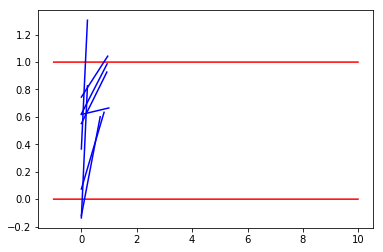

3.125


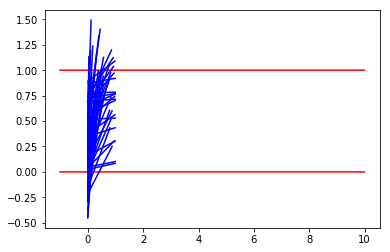

3.194888178913738


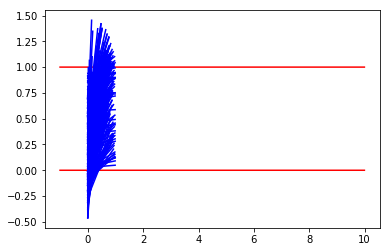

3.1104199066874028


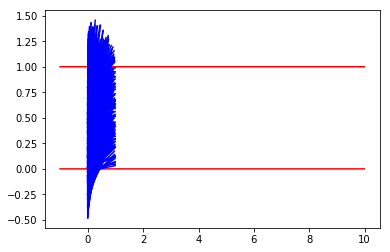

In [35]:
# Місце для Вашого коду
from scipy.stats import uniform
def emp (n):
    x=np.arange(-1, 10, 0.01)
    y = xi.pdf(x)
    plt.plot(x, np.ones(len(x)), 'r')
    plt.plot(x, np.zeros(len(x)), 'r')
    
    xi1=uniform(loc=0, scale=1)
    xi2=uniform(loc=0, scale=np.pi)
    xi1_=xi1.rvs(n)
    xi2_=xi2.rvs(n)
    l=0
    a=(xi1_+0.5*np.abs(np.sin(xi2_))>=1)
    b=(xi1_-0.5*np.abs(np.sin(xi2_))<=0)
    #print(a, b)
    rez=np.maximum(a,b)
    p=(np.sum(rez))/n
    pi=2/p
    print(pi)
    for i in range (n):
        x_=np.arange (0, int(100*np.cos(xi2_[i])), 0.001)
        x_/=100
        y_=xi1_[i]-0.5*np.abs(np.sin(xi2_[i]))+np.tan(xi2_[i])*x_
        #print(y_)
        plt.plot(x_, y_, 'b')
    plt.show()
emp(10)
emp(100)
emp(500)
emp(1000)
